# Разведочный анализ

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')


from visuals import *
from my_lib import *
from SSA_lib import SSA

In [2]:
plt.rcParams['figure.figsize'] = 13, 7
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 16

In [3]:
df = pd.read_csv('sensor_data.csv')

df = df.sort_values(by=['date'],)

df = df[:8*365*3-1]

In [4]:
df.head()

,Unnamed: 0,date,Температура воздуха,Относительная влажность почвы_p1,Освещенность_p1,Кислотность почвы_p1,Относительная влажность почвы_p2,Освещенность_p2,Кислотность почвы_p2,Относительная влажность почвы_p3,Освещенность_p3,Кислотность почвы_p3,Относительная влажность почвы_p4,Освещенность_p4,Кислотность почвы_p4,Относительная влажность почвы_p5,Освещенность_p5,Кислотность почвы_p5
8766,8766,2052-01-01 00:00:00,10.9,95.948236,2.029285,7.858973,96.997354,10.550111,NaN,96.687370,10.020006,6.307729,98.187496,-1.324497,NaN,NaN,11.467041,8.012175
8765,8765,2052-01-01 03:00:00,11.3,98.388953,-0.973886,7.431705,94.040565,2.696872,NaN,97.299356,8.184974,7.193442,96.647847,6.925254,NaN,NaN,9.275594,7.462803
8764,8764,2052-01-01 06:00:00,11.3,97.591535,4.706175,6.843585,95.681661,10.468263,NaN,95.219937,1.261181,7.524056,99.099482,11.669676,NaN,NaN,8.127634,7.442175
8763,8763,2052-01-01 09:00:00,11.6,94.625269,9.359896,7.935569,95.187210,1.342752,NaN,95.477356,9.528366,6.876868,97.776995,2.595690,NaN,NaN,6.890386,6.995560
8762,8762,2052-01-01 12:00:00,11.9,94.599833,9.934135,7.202713,96.083500,2.875814,NaN,94.756075,-1.928082,6.520030,97.642116,1.620365,NaN,NaN,-1.668564,6.685177


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8759 entries, 8766 to 8
Data columns (total 18 columns):
Unnamed: 0                          8759 non-null int64
date                                8759 non-null object
Температура воздуха                 8759 non-null float64
Относительная влажность почвы_p1    8144 non-null float64
Освещенность_p1                     8224 non-null float64
Кислотность почвы_p1                8272 non-null float64
Относительная влажность почвы_p2    8332 non-null float64
Освещенность_p2                     8069 non-null float64
Кислотность почвы_p2                7966 non-null float64
Относительная влажность почвы_p3    7451 non-null float64
Освещенность_p3                     8247 non-null float64
Кислотность почвы_p3                7968 non-null float64
Относительная влажность почвы_p4    8445 non-null float64
Освещенность_p4                     7613 non-null float64
Кислотность почвы_p4                8236 non-null float64
Относительная влажность по

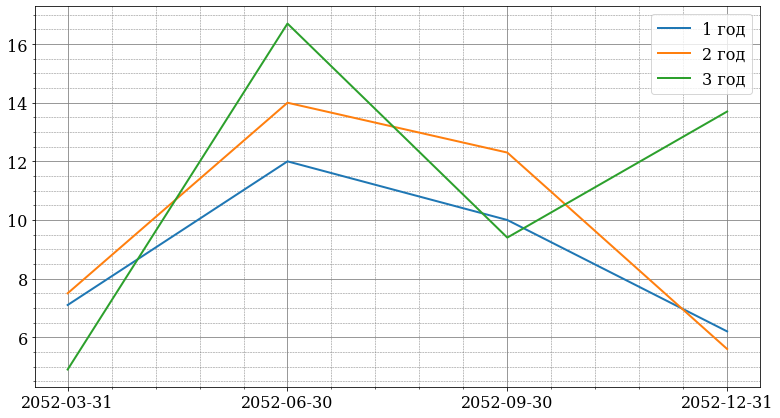

In [6]:
ans = pd.read_csv('harvest_yields.csv')
for i in range(3):    
    plt.plot(ans['Unnamed: 0'][:4].values,ans['Урожай'][4*i:4*(i+1)],label = str(i+1)+' год')
    plt.legend()
    plt.grid(which='major',
        color = 'gray', 
        linewidth = 0.8)
    plt.minorticks_on()
    plt.grid(which='minor', 
        color = 'gray', 
        linestyle = '--',
        linewidth = 0.5)
ans['Урожай'].loc[11] = ans['Урожай'][11]/2

Пик за 3 год какжеться нелогичным

    1) с точки зрения биологии (в января даже в теплице не может быть сущесвеннно лучшего результата)
    2) с точки зрения общей тенденции

Следовательно уменьшим в 2 раза в этой точке величину целевой переменной 

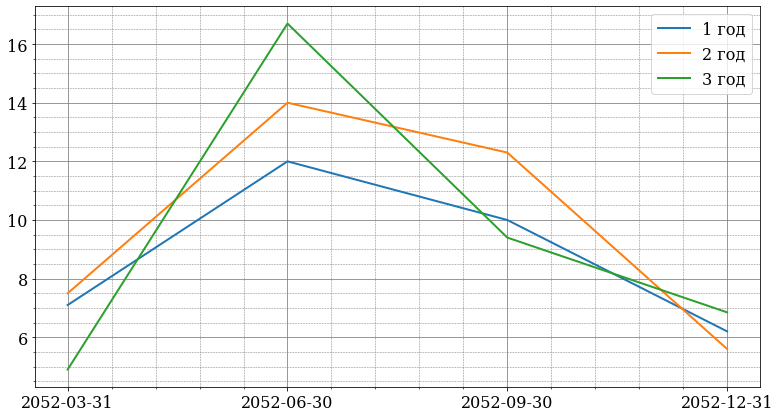

In [7]:
for i in range(3):    
    plt.plot(ans['Unnamed: 0'][:4].values,ans['Урожай'][4*i:4*(i+1)],label = str(i+1)+' год')
    plt.legend()
    plt.grid(which='major',
        color = 'gray', 
        linewidth = 0.8)
    plt.minorticks_on()
    plt.grid(which='minor', 
        color = 'gray', 
        linestyle = '--',
        linewidth = 0.5)

# 1 период

In [8]:
df['mouth'] = df['date'].apply(lambda x: x[:7])
df['day'] = df['date'].apply(lambda x: x[:10])

In [9]:
y_1_m123 = df[:8*30*3] 

## Температура

In [10]:
temperature_SSA = SSA(y_1_m123['Температура воздуха'].values, 240)

In [11]:
#Корреляционная карта для отыскания информативных сигналов

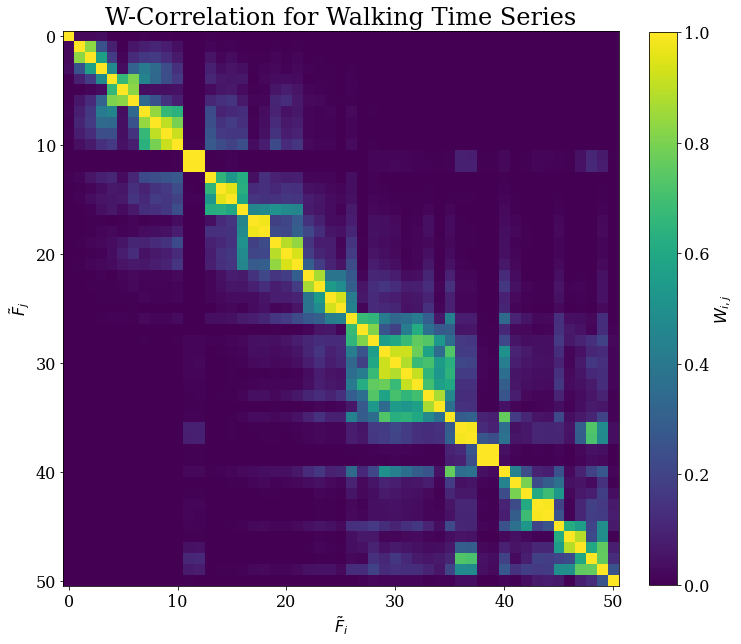

In [12]:
plt.figure(figsize=(11, 11))
temperature_SSA.plot_wcorr(max=50)
plt.title("W-Correlation for Walking Time Series");

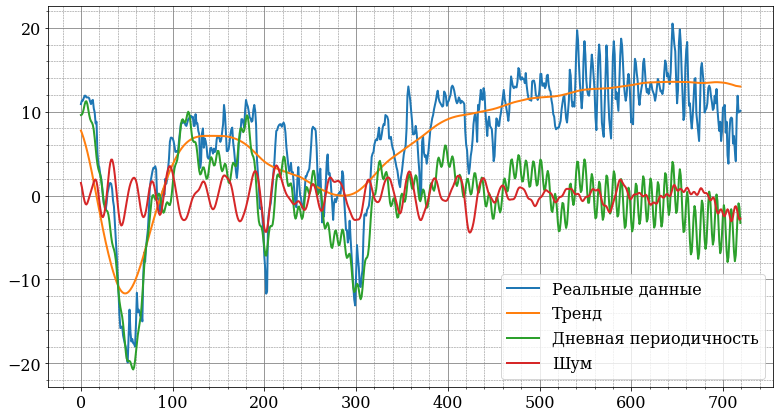

In [13]:
plt.plot(np.arange(8*30*3),y_1_m123['Температура воздуха'].values,label = 'Реальные данные')
plt.plot(np.arange(8*30*3),temperature_SSA.reconstruct(slice(0,3)), label='Тренд')
plt.plot(np.arange(8*30*3),temperature_SSA.reconstruct(slice(1,13)), label='Дневная периодичность')
plt.plot(np.arange(8*30*3),temperature_SSA.reconstruct(slice(13,30)), label='Шум')

plt.legend()
plt.grid(which='major',
    color = 'gray', 
    linewidth = 0.8)
plt.minorticks_on()
plt.grid(which='minor', 
    color = 'gray', 
    linestyle = '--',
    linewidth = 0.5)

In [14]:
#для полинома

In [15]:
y = temperature_SSA.reconstruct(slice(0,3))[:]

x_0 = np.ones((len(y),1))
x_1 = np.array([np.arange(8*30*3)]).T
x_2 = np.array([np.arange(8*30*3)]).T**2
x_3 = np.array([np.arange(8*30*3)]).T**3
x_4 = np.array([np.arange(8*30*3)]).T**4

X = np.concatenate((x_0,x_1,x_2,x_3,x_4),axis = 1)

beta = np.linalg.inv(X.T@X)@X.T@y

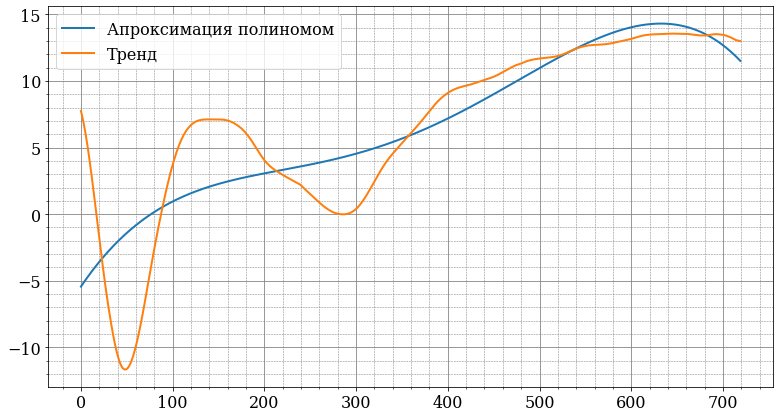

In [16]:
plt.plot(np.arange(8*30*3),beta@X.T,label = 'Апроксимация полиномом')
plt.plot(np.arange(8*30*3),temperature_SSA.reconstruct(slice(0,3)), label='Тренд')

plt.legend()
plt.grid(which='major',
    color = 'gray', 
    linewidth = 0.8)
plt.minorticks_on()
plt.grid(which='minor', 
    color = 'gray', 
    linestyle = '--',
    linewidth = 0.5)

# Относительная влажность почвы

In [17]:
humidity_SSA_1 = SSA(y_1_m123['Относительная влажность почвы_p1'].values, 50)

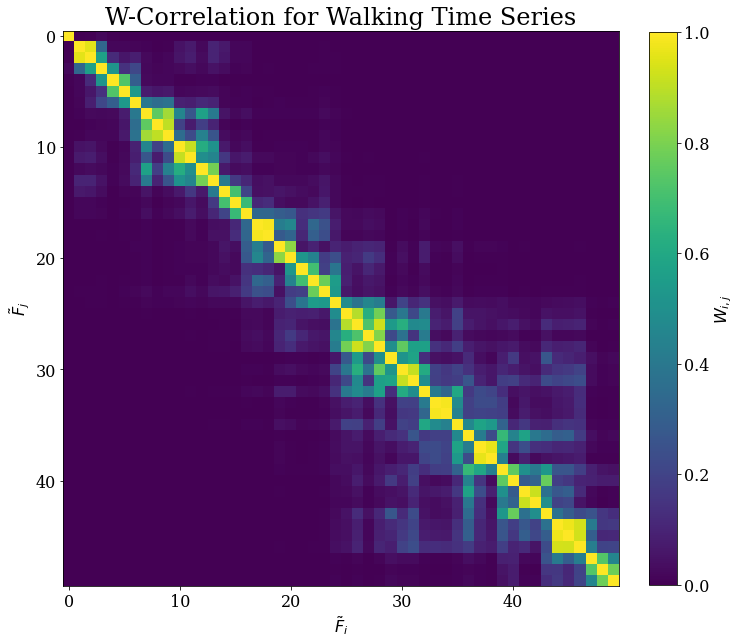

In [18]:
plt.figure(figsize=(11, 11))
humidity_SSA_1.plot_wcorr(max=50)
plt.title("W-Correlation for Walking Time Series");

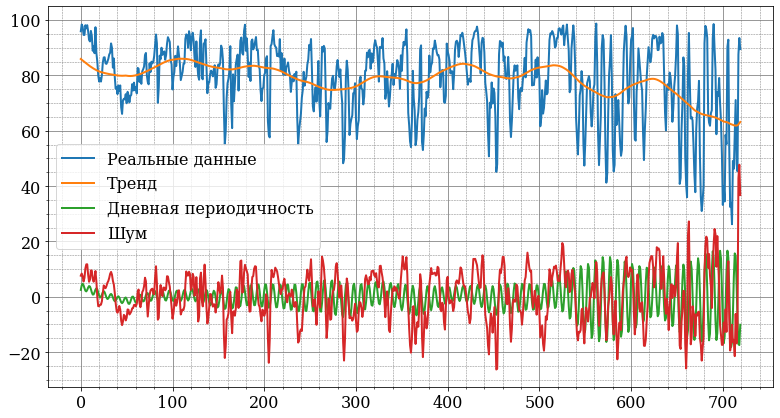

In [19]:
plt.plot(np.arange(8*30*3),y_1_m123['Относительная влажность почвы_p1'].values,label = 'Реальные данные')
plt.plot(np.arange(8*30*3),humidity_SSA_1.reconstruct(slice(0,1)), label='Тренд')
plt.plot(np.arange(8*30*3),humidity_SSA_1.reconstruct(slice(1,3)), label='Дневная периодичность')
plt.plot(np.arange(8*30*3),humidity_SSA_1.reconstruct(slice(3,30)), label='Шум')

plt.legend()
plt.grid(which='major',
    color = 'gray', 
    linewidth = 0.8)
plt.minorticks_on()
plt.grid(which='minor', 
    color = 'gray', 
    linestyle = '--',
    linewidth = 0.5)

In [20]:
#для полинома

In [21]:
y = humidity_SSA_1.reconstruct(slice(0,1))[:]

x_0 = np.ones((len(y),1))
x_1 = np.array([np.arange(8*30*3)]).T
x_2 = np.array([np.arange(8*30*3)]).T**2
x_3 = np.array([np.arange(8*30*3)]).T**3
x_4 = np.array([np.arange(8*30*3)]).T**4

X = np.concatenate((x_0,x_1,x_2,x_3,x_4),axis = 1)

beta = np.linalg.inv(X.T@X)@X.T@y

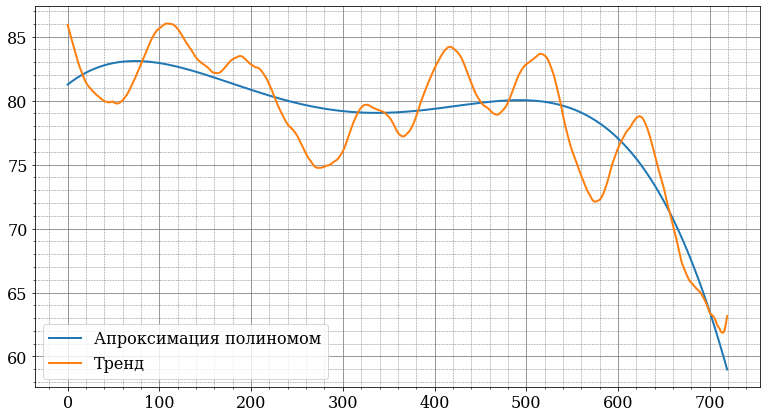

In [22]:
plt.plot(np.arange(8*30*3),beta@X.T,label = 'Апроксимация полиномом')
plt.plot(np.arange(8*30*3),humidity_SSA_1.reconstruct(slice(0,1)), label='Тренд')

plt.legend()
plt.grid(which='major',
    color = 'gray', 
    linewidth = 0.8)
plt.minorticks_on()
plt.grid(which='minor', 
    color = 'gray', 
    linestyle = '--',
    linewidth = 0.5)

# Модель

Идея взять за пространство признаков 

1) коэффициенты пред полиномами (сохранения информации о тенденциях)

2) средних и ско по месяцам - сохнранение масштабов и границ

In [23]:
def new_feature_space(df,n_mod):
    new_features = []
    for i in range(3):

        data = df[(8*365)*i:(8*365)*i+8*30*(3*n_mod)] 
        for n_p in range(1,6):

            temp_SSA = SSA(data['Температура воздуха'].dropna().values, 50)

            y = temp_SSA.reconstruct(slice(0,1))
            #plt.plot(y)
            #plt.show()
            x_0 = np.ones((len(y),1))
            x_1 = np.array([np.arange(len(y))]).T
            x_2 = np.array([np.arange(len(y))]).T**2
            x_3 = np.array([np.arange(len(y))]).T**3
            x_4 = np.array([np.arange(len(y))]).T**4

            X = np.concatenate((x_0,x_1,x_2,x_3,x_4),axis = 1)

            beta = np.linalg.inv(X.T@X)@X.T@y

            mean = data.groupby('mouth')['Температура воздуха'].mean().values
            std  = data.groupby('mouth')['Температура воздуха'].std().values

            temp = np.concatenate((beta,mean,std),axis = 0)

            for name in ['Относительная влажность почвы_p','Освещенность_p','Кислотность почвы_p']:

                temp_SSA = SSA(data[name+str(n_p)].dropna().values, 50)

                y = temp_SSA.reconstruct(slice(0,1))
                #plt.plot(y)
                #plt.show()
                x_0 = np.ones((len(y),1))
                x_1 = np.array([np.arange(len(y))]).T
                x_2 = np.array([np.arange(len(y))]).T**2
                x_3 = np.array([np.arange(len(y))]).T**3
                x_4 = np.array([np.arange(len(y))]).T**4

                X = np.concatenate((x_0,x_1,x_2,x_3,x_4),axis = 1)

                beta = np.linalg.inv(X.T@X)@X.T@y

                mean = data.groupby('mouth')['Относительная влажность почвы_p'+str(n_p)].mean().values
                std  = data.groupby('mouth')['Относительная влажность почвы_p'+str(n_p)].std().values

                temp = np.concatenate((temp, beta,mean,std),axis = 0)

            new_features.append(temp)

    return np.array(new_features)

In [24]:
import torch
from torch import nn, optim

device = ('cuda' if torch.cuda.is_available() else 'cpu')

class Regressor(nn.Module):

    def __init__(self, in_shape):
        super(Regressor, self).__init__()
        
        self.Reg = nn.Sequential(
            nn.Linear(in_shape, 64),
            nn.ReLU(True),
            nn.Dropout(0.1),
            nn.Linear(64, 64),
            nn.ReLU(True),
            nn.Dropout(0.1),
            nn.Linear(64, 64),
            nn.ReLU(True),
            nn.Dropout(0.1),
            nn.Linear(64, 32),
            nn.ReLU(True),
            nn.Dropout(0.1),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        x = self.Reg(x)
        return x

def train(model, error, optimizer, n_epochs, x, y):
    model.train()
    for epoch in range(1, n_epochs + 1):
        with torch.no_grad():
            pred = model.Reg( x[[3,7,11],:])
            mse = error(pred, y[[3,7,11],:])
            
        optimizer.zero_grad()
        select = [0, 1, 2, 4, 5, 6, 8, 9, 10]
        output = model(x[select,:])
        loss = error(output, y[select,:])
        loss.backward()
        optimizer.step()
        
       
        
        if epoch % int(0.1*n_epochs) == 0:
            print(f'epoch {epoch} \t Loss: {loss.item():.4g} \t Loss_test: {mse.item():.4g}')

In [25]:
n_mod = 1  # номер периода
x = new_feature_space(df,n_mod)
X = torch.from_numpy(x).to(device)

#значения за нужный период
s = np.array([0,4,8])+n_mod-1

#примем результативность каждой теплицы как 1/5 от итогового за данный период
ans_1 = np.array([ans['Урожай'].values[[s]].repeat(5,axis=0)/5]).T
y = torch.from_numpy(ans_1).to(device)

In [29]:
select = [0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13]

model_1 = Regressor(in_shape=x.shape[1]).double().to(device)

error = nn.MSELoss()

optimizer = optim.Adam(model_1.parameters())

train(model_1, error, optimizer, 4000, X[select,:], y[select,:])

epoch 400 	 Loss: 0.05278 	 Loss_test: 0.1229
epoch 800 	 Loss: 0.0292 	 Loss_test: 0.2354
epoch 1200 	 Loss: 0.01051 	 Loss_test: 0.1971
epoch 1600 	 Loss: 0.007343 	 Loss_test: 0.2147
epoch 2000 	 Loss: 0.02142 	 Loss_test: 0.1388
epoch 2400 	 Loss: 0.002218 	 Loss_test: 0.09572
epoch 2800 	 Loss: 0.007031 	 Loss_test: 0.06761
epoch 3200 	 Loss: 0.005174 	 Loss_test: 0.06535
epoch 3600 	 Loss: 0.004529 	 Loss_test: 0.04782
epoch 4000 	 Loss: 0.001613 	 Loss_test: 0.06809


In [30]:
with torch.no_grad():
    pred = model_1.Reg(X[[4,9,14],:])
    mse = error(pred, y[[4,9,14],:]).item()
    pred = pred.cpu().detach().numpy()

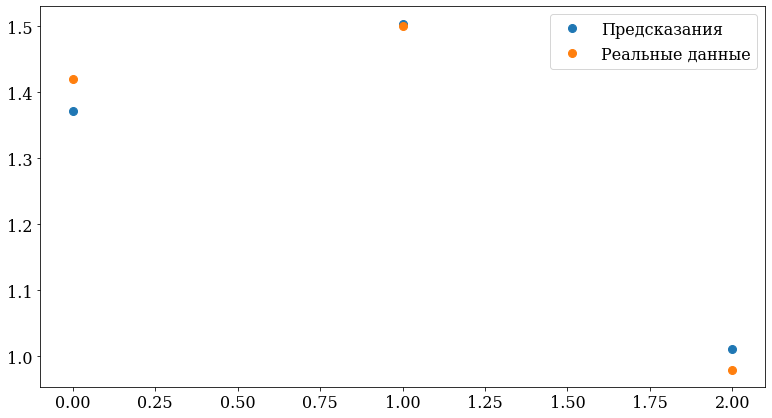

In [31]:
plt.plot(pred,'o', label = 'Предсказания')
plt.plot(y[[4,9,14],:],'o',label = 'Реальные данные')
plt.legend()
plt.show()

На валидацонной выборке алгоритм смог предсказать близкие значения для итоговой